# 图像特效-饱和度增强

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def threshold(src,threshmax,newval):
    dst = np.zeros_like(src)
    idx = (src <= threshmax)
    dst[idx] = newval
    dst[~idx] = src[~idx]
    return dst

In [6]:
def hue_saturation(img_rgb, alpha = 1, beta = 1):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0]
    saturation = img_hsv[:,:,1]
    hue = threshold(hue * alpha ,threshmax=179, newval=179)
    saturation = threshold(saturation * beta,threshmax=255, newval=255)
    img_hsv[:,:,0] = hue
    img_hsv[:,:,1] = saturation
    img_transformed = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    return img_transformed

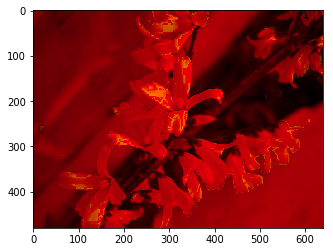

In [7]:
dst = hue_saturation(rgb,alpha=1.1,beta=0.9)
plt.imshow(dst)